<a href="https://colab.research.google.com/github/NajlaaNawaii/Karpathy-s-Neural-Networks-/blob/main/Makemore/Building_makemore_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Makemore is a character level language model, it predicts the next character in the sequesnce (word).

#Bigram language model

In [1]:
words=open("/content/names.txt",'r').read().splitlines()

##Bigrams sorting

In [2]:
set(''.join(words[:5]))

{'a', 'b', 'e', 'h', 'i', 'l', 'm', 'o', 'p', 's', 'v'}

In [3]:
#Using a dictionary
bigrams={}
for word in words[:5]:
  chars=['<s>']+list(word)+['<e>']
  for ch1,ch2 in zip(chars,chars[1:]):
    bigram=(ch1,ch2)
    #calculate the frequency of a certain bigram
    bigrams[bigram]=bigrams.get(bigram,0)+1

In [4]:
#sorted return a list
sorted(bigrams.items(),key= lambda item : item[1], reverse=True)

[(('a', '<e>'), 5),
 (('i', 'a'), 2),
 (('<s>', 'e'), 1),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('<s>', 'o'), 1),
 (('o', 'l'), 1),
 (('l', 'i'), 1),
 (('i', 'v'), 1),
 (('v', 'i'), 1),
 (('<s>', 'a'), 1),
 (('a', 'v'), 1),
 (('v', 'a'), 1),
 (('<s>', 'i'), 1),
 (('i', 's'), 1),
 (('s', 'a'), 1),
 (('a', 'b'), 1),
 (('b', 'e'), 1),
 (('e', 'l'), 1),
 (('l', 'l'), 1),
 (('l', 'a'), 1),
 (('<s>', 's'), 1),
 (('s', 'o'), 1),
 (('o', 'p'), 1),
 (('p', 'h'), 1),
 (('h', 'i'), 1)]

In [5]:
import torch

In [6]:
#Using a torch.tensor()
N=torch.zeros((28,28),dtype=torch.int32) #because the counts are integers
Characters=sorted(list(set(''.join(words))))
#You can't index using chars, it has to be integers
stoi={s:i for i,s in enumerate(Characters)}
stoi["<s>"]=26
stoi["<e>"]=27
#to make the plt visualization
itos={i:s for s,i in stoi.items()}

In [7]:
for word in words:
  #list of chars
  chars=['<s>']+list(word)+['<e>']
  for ch1,ch2 in zip(chars,chars[1:]):
    id1=stoi[ch1]
    id2=stoi[ch2]
    N[id1,id2]+=1




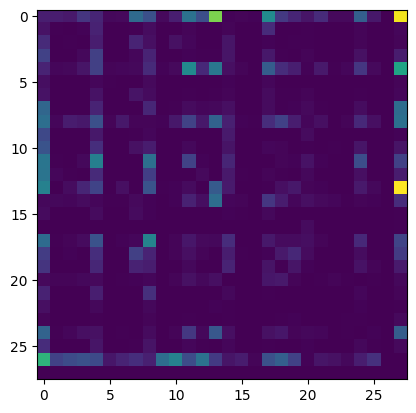

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

(-0.5, 27.5, 27.5, -0.5)

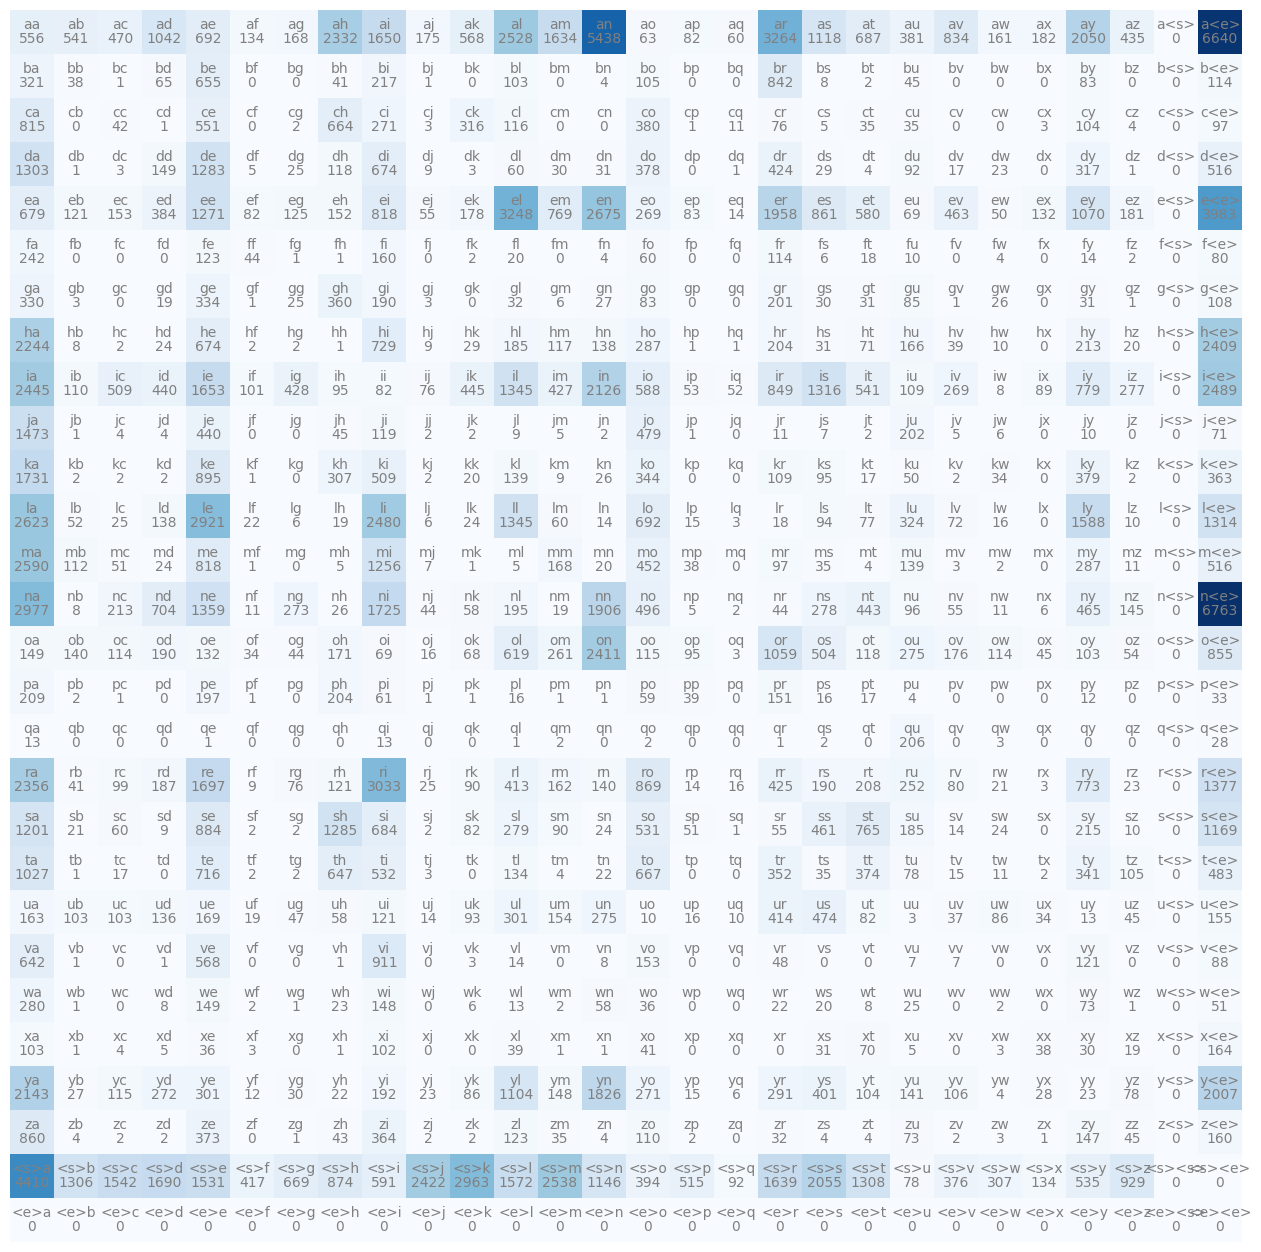

In [9]:
#genertae a plt figure, with grades of blues, having all biagrams
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(28):
  for j in range(28):
    chstr=itos[i]+itos[j]
    plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
    #torch tensor, to get the data .item()
    plt.text(j,i,N[i,j].item(),ha="center",va="top",color="gray")
plt.axis('off')



##Because of memory storage and we have row&col with all zeros


In [10]:
#Using a torch.tensor()
N=torch.zeros((27,27),dtype=torch.int32) #because the counts are integers
Characters=sorted(list(set(''.join(words))))
#You can't index using chars, it has to be integers
stoi={s:i+1 for i,s in enumerate(Characters)}
stoi["."]=0
#to make the plt visualization
itos={i:s for s,i in stoi.items()}

In [11]:
for word in words:
  #list of chars
  chars=['.']+list(word)+['.']
  for ch1,ch2 in zip(chars,chars[1:]):
    id1=stoi[ch1]
    id2=stoi[ch2]
    N[id1,id2]+=1




(-0.5, 26.5, 26.5, -0.5)

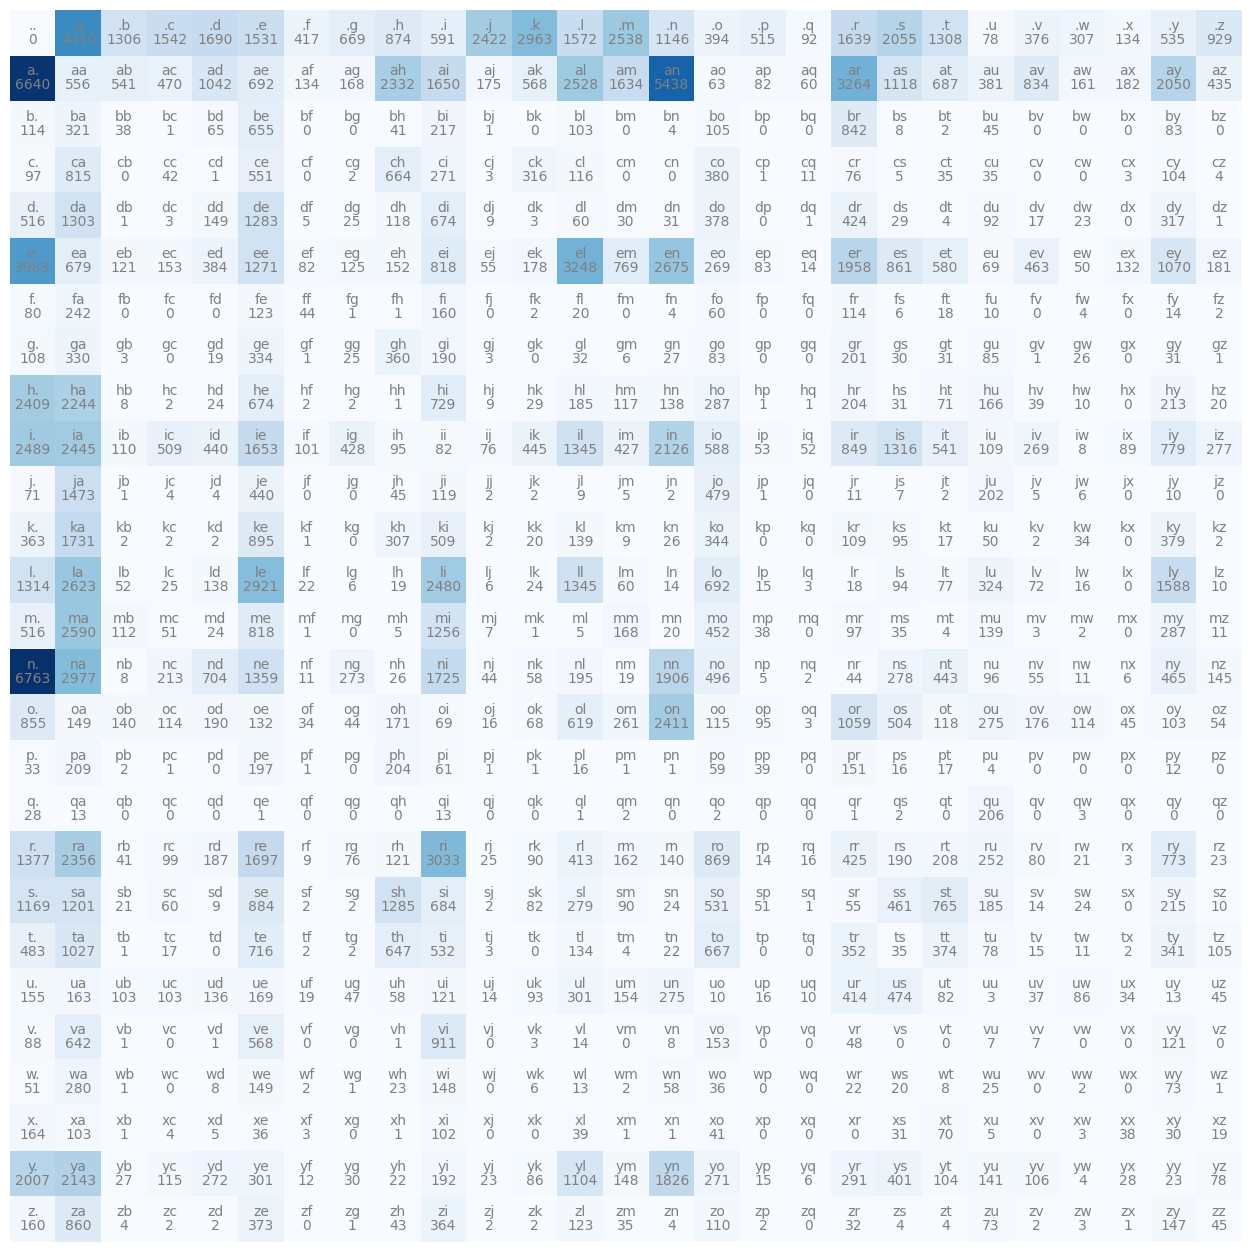

In [12]:
#genertae a plt figure, with grades of blues, having all biagrams
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
  for j in range(27):
    chstr=itos[i]+itos[j]
    plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
    #torch tensor, to get the data .item()
    plt.text(j,i,N[i,j].item(),ha="center",va="top",color="gray")
plt.axis('off')



In [14]:
#Generator helps as a tool for making the random generation deterministic when a seed is used
p=N[0].float() #Now we want to create probabilities
p=p/p.sum()

g = torch.Generator().manual_seed(2147483647)
#Sampling from a a distribution p, associating each prob with index
ix= torch.multinomial(p,num_samples=1, replacement=True, generator=g).item()#with item it'll return a tensor([ix])
itos[ix]


'j'

In [15]:
g = torch.Generator().manual_seed(2147483647)

#Generating 50 names
for i in range(5):
  out=[]
  ix=0
  while True:
    p=N[ix].float() #Now we want to create probabilities
    p=p/p.sum()
    ix= torch.multinomial(p,num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


### small note for future me; YOU NOW KNOW HOW TO DO BROADCASTING/VECTORIZING!

In [21]:
#Because we're doing the same operation of normalizing each row , we can do it once!
#Model smoothing, so that you don't get log_prob=-inf, because prob=0
P=(N+1).float()
#keepdim ==> (27,1) , otherwise it'll be squeezed ==> (27)
summed_rows=P.sum(1, keepdim=True)
P/=summed_rows #inplace operation; no extra memory

In [22]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out=[]
  ix=0 #starting token
  while True:
    p = P[ix]
    ix= torch.multinomial(p,num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    #end of the word
    if ix==0:
      break
  print(''.join(out))


junide.
janasah.
p.
cony.
a.


# Notes
"Have respect for broadcasting and check your work!"


Make sure you're broadcasting on the right direction"

In [23]:
# #Because we're doing the same operation of normalizing each row , we can do it once!
# P=N.float()
# #keepdim ==> (27,1) , otherwise it'll be squeezed ==> (27)
# '''
# 27,27
#   27 ==> right aligned
# ----
# 27,27
# 1,27
# ----
# 27,27

# This now will broadcasted across columns WHICH IS FALSE!

# '''
# summed_rows=P.sum(1)
# P/=summed_rows

In [24]:
# g = torch.Generator().manual_seed(2147483647)

# for i in range(50):
#   out=[]
#   ix=0 #starting token
#   while True:
#     p = P[ix]
#     ix= torch.multinomial(p,num_samples=1, replacement=True, generator=g).item()
#     out.append(itos[ix])
#     #end of the word
#     if ix==0:
#       break
#   print(''.join(out))


#Model evaluation and loss function.
- The model parameters are the liklihood that the model gave to each bigram.

- Depending on these parameters/liklihood, The model is going to predict the next character in each word. And we want to evaluate if these assigned liklihood/probabilities/parameters are good.

- The base line here is that if the model learned from the data; then it would give some bigrams higher probabilities/liklihood than other ones ==> Because they would just appear more.




In [25]:
log_liklihood=0.0
n=0 #for counting the number of bigrams
for word in words:
  chars=['.'] + list(word) + ['.']
  for ch1,ch2 in zip(chars,chars[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    p=P[ix1,ix2]
    logged_p=torch.log(p)
    #liklihood is the product of all probabilites
    log_liklihood+=logged_p
    n+=1
    # print(f"{ch1}{ch2}: {p: .4f} {logged_p: .4f}")

print(f"{log_liklihood=}")
'''
Because the log_liklihood ( accumlation of log_probabilities) takes values
between (-inf, 0), meaning lower values of this log_liklihood is bad, when
there's many low probabilities the log_liklihood will tend to -infinity.

And because we want to treat it as a loss function, where lower values are good,
we're taken the inverse of this function.
Maximization ==> Minimization.

'''
nll= -log_liklihood
print(f"{nll}")

'''Normalized negative log_liklihood, lower is good meaning it assigned
high probabilities to your data; Maximizing the liklihood of seeing this data
part of this distribution.'''

print(f"{nll/n}")


log_liklihood=tensor(-559951.5625)
559951.5625
2.4543561935424805


#What I learned:
1. zip(iter1,iter2), when there's one longer than the other, it dismiss the ones that don't have match.
2. Lambda functions can take many arguments: but one one expression that's evaluated and returned.
3. tuples are indexed Example_Tuple[0], returns the first element in the tuple.
5. sorted(iterable, key=None, reverse=False) ==> list
  - Key is a fucntion; keys's return value is what Python uses to sort the elements.

6. plt.text(j, i, N[i, j]) correctly places the text at the corresponding matrix element because
 j is the horizontal position (column), and i is the vertical position (row).

7. keepdim prevents the sum operation from squeezing the dimention across which you did the sum, the output is (d,1) instead of (d).